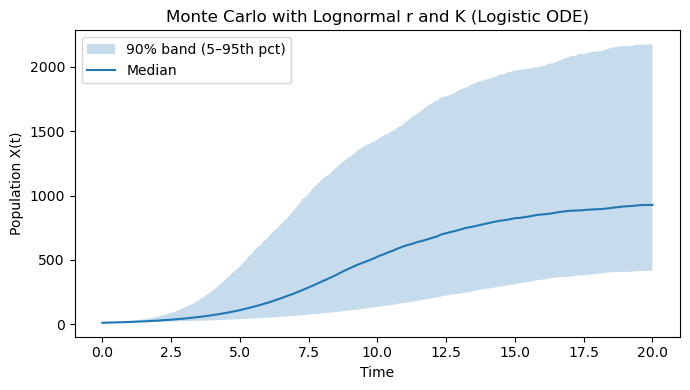

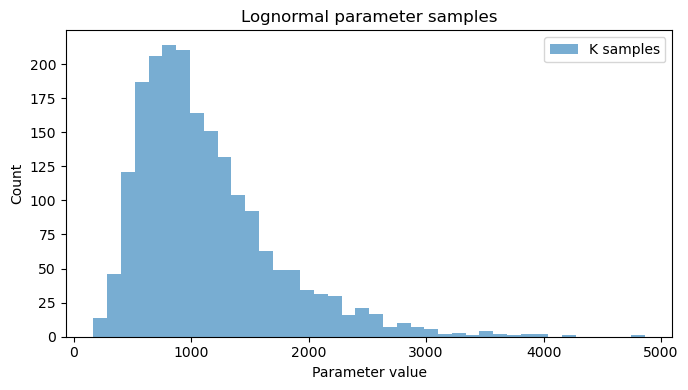

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
 
# --- Monte Carlo setup ---
rng = np.random.default_rng(123)
N = 2000  # number of Monte Carlo draws
 
# Lognormal parameterization: if Z ~ N(mu, sigma), then X = exp(Z) is lognormal
# median(X) = exp(mu), geometric std = exp(sigma)
mu_r, sigma_r = np.log(0.5), 0.35     # r has median ~0.5
mu_K, sigma_K = np.log(1000.0), 0.5   # K has median ~1000
 
r_samps = rng.lognormal(mean=mu_r, sigma=sigma_r, size=N)
K_samps = rng.lognormal(mean=mu_K, sigma=sigma_K, size=N)
 
# --- ODE model: logistic growth ---
# dX/dt = r * X * (1 - X/K)
def logistic(t, X, r, K):
    return r * X * (1.0 - X / K)
 
# --- Simulation settings ---
t0, t1 = 0.0, 20.0
t_eval = np.linspace(t0, t1, 300)
X0 = 10.0
 
# --- Run Monte Carlo ensemble ---
trajectories = np.empty((N, t_eval.size))
for i, (r, K) in enumerate(zip(r_samps, K_samps)):
    sol = solve_ivp(logistic, (t0, t1), [X0], t_eval=t_eval, args=(r, K), rtol=1e-6, atol=1e-9)
    trajectories[i, :] = sol.y[0]
 
# --- Summary statistics across the ensemble ---
p05 = np.percentile(trajectories, 5, axis=0)
p50 = np.percentile(trajectories, 50, axis=0)
p95 = np.percentile(trajectories, 95, axis=0)
 
# --- Plot ---
plt.figure(figsize=(7,4))
plt.fill_between(t_eval, p05, p95, alpha=0.25, label='90% band (5–95th pct)')
plt.plot(t_eval, p50, label='Median')
plt.xlabel('Time')
plt.ylabel('Population X(t)')
plt.title('Monte Carlo with Lognormal r and K (Logistic ODE)')
plt.legend()
plt.tight_layout()
plt.show()
 
# --- Also: distribution of parameters (optional quick check) ---
plt.figure(figsize=(7,4))
plt.hist(K_samps, bins=40, alpha=0.6, label='K samples')
plt.xlabel('Parameter value')
plt.ylabel('Count')
plt.title('Lognormal parameter samples')
plt.legend()
plt.tight_layout()
plt.show()
 
